In [3]:
import pandas as pd
# definir path del fichero
fpath='/Users/jperez/Downloads/'
fichero=fpath+'historial-de-reproducciones.json'

In [4]:
# crear un dataframe desde el fichero. Un dataframe es un objeto parecido a una tabla de una base de datos
df =pd.read_json(fichero)

In [5]:
# inspeccionar contenidos del dataframe
df.head()

,header,title,titleUrl,subtitles,time,products,details
0,YouTube,Has visto EX-GIMNASTA PROFESIONAL SALVA SU CAR...,https://www.youtube.com/watch?v=2LWcJzTa4-M,"[{'name': 'The Wild Project', 'url': 'https://...",2021-02-27T12:49:33.351Z,[YouTube],NaN
1,YouTube,Has visto Yuyee y los traidores,https://www.youtube.com/watch?v=MyAjLwURj5I,"[{'name': 'FRANK CUESTA - CANAL YOUTUBE', 'url...",2021-02-26T23:47:18.913Z,[YouTube],NaN
2,YouTube,"Has visto Santi...hoy , ayer y siempre",https://www.youtube.com/watch?v=vzu270YVZ1M,"[{'name': 'FRANK CUESTA - CANAL YOUTUBE', 'url...",2021-02-26T23:38:23.539Z,[YouTube],NaN
3,YouTube,Has visto Yuyee ya esta currando (trabajando),https://www.youtube.com/watch?v=CG3tvoLwHsk,"[{'name': 'FRANK CUESTA - CANAL YOUTUBE', 'url...",2021-02-26T23:27:19.202Z,[YouTube],NaN
4,YouTube,Has visto Yuyee vuelve a liberar animales,https://www.youtube.com/watch?v=0QVKmjN8TmU,"[{'name': 'FRANK CUESTA - CANAL YOUTUBE', 'url...",2021-02-26T23:19:02.243Z,[YouTube],NaN


In [6]:
# convertimos a tiempo la columna time
df['date']=pd.to_datetime(df['time'])

In [8]:
# inspeccionar un dataframe , columnas , tipo de las columnas y cuantas entradas (filas) tiene
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23174 entries, 0 to 23173
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   header     23174 non-null  object             
 1   title      23174 non-null  object             
 2   titleUrl   22626 non-null  object             
 3   subtitles  20980 non-null  object             
 4   time       23174 non-null  object             
 5   products   23174 non-null  object             
 6   details    19 non-null     object             
 7   date       23174 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 1.4+ MB


,header,title,titleUrl,subtitles,time,products,details,date
0,YouTube,Has visto EX-GIMNASTA PROFESIONAL SALVA SU CAR...,https://www.youtube.com/watch?v=2LWcJzTa4-M,"[{'name': 'The Wild Project', 'url': 'https://...",2021-02-27T12:49:33.351Z,[YouTube],NaN,2021-02-27 12:49:33.351000+00:00
1,YouTube,Has visto Yuyee y los traidores,https://www.youtube.com/watch?v=MyAjLwURj5I,"[{'name': 'FRANK CUESTA - CANAL YOUTUBE', 'url...",2021-02-26T23:47:18.913Z,[YouTube],NaN,2021-02-26 23:47:18.913000+00:00
2,YouTube,"Has visto Santi...hoy , ayer y siempre",https://www.youtube.com/watch?v=vzu270YVZ1M,"[{'name': 'FRANK CUESTA - CANAL YOUTUBE', 'url...",2021-02-26T23:38:23.539Z,[YouTube],NaN,2021-02-26 23:38:23.539000+00:00
3,YouTube,Has visto Yuyee ya esta currando (trabajando),https://www.youtube.com/watch?v=CG3tvoLwHsk,"[{'name': 'FRANK CUESTA - CANAL YOUTUBE', 'url...",2021-02-26T23:27:19.202Z,[YouTube],NaN,2021-02-26 23:27:19.202000+00:00
4,YouTube,Has visto Yuyee vuelve a liberar animales,https://www.youtube.com/watch?v=0QVKmjN8TmU,"[{'name': 'FRANK CUESTA - CANAL YOUTUBE', 'url...",2021-02-26T23:19:02.243Z,[YouTube],NaN,2021-02-26 23:19:02.243000+00:00


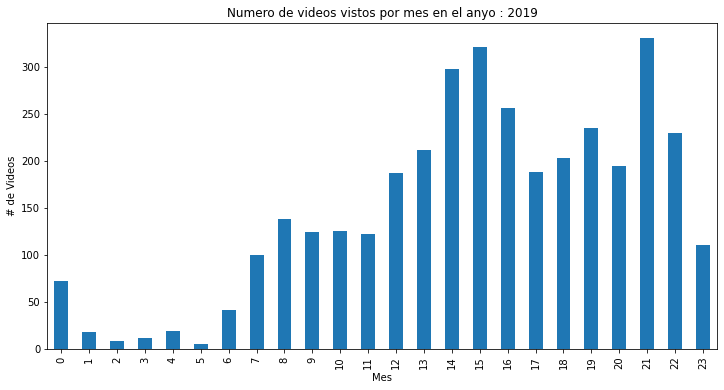

In [9]:
# crear un historgrama con el numero de videos vistos a lo largo tiempo determinado
# 1. agrupamos los datos con el comando groupby en rangos de 1 mes
# 2. contamos el numero de objetos en cada agrupado 
# 3. hacemos un plot de tipo bar (histograma)
import matplotlib.pyplot as plt
f , ax = plt.subplots(figsize=(12,6))

# seleccionar el anyo a desplegar
year=2019
subset=df.loc[df['date'].dt.year==year]

# mostrarlo (seleccionamos una columna , para que no se muestren todas)
subset['title'] \
    .groupby(df['date'].dt.hour) \
    .count().plot(kind="bar",ax=ax) 

plt.title('Numero de videos vistos por mes en el anyo : %d' %year);
plt.xlabel('Mes');
plt.ylabel('# de Videos');